In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
from sklearn.datasets import load_diabetes

dia=load_diabetes()

dia

dia.feature_names

df=pd.DataFrame(dia.data)
df.columns=dia.feature_names
df['target']=dia.target

df

df.isnull().sum()

df.skew()

## Traing the model

x=df.drop('target',1)
y=df[['target']]

## train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=101)



In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

## Training the Model
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train,y=Y_train.values,
          validation_data=(X_test,Y_test.values),epochs=400,callbacks=[early_stop])

Epoch 1/400

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

12/12 [==============================] - 0s 11ms/step - loss: 28785.4277 - val_loss: 30133.2051
Epoch 2/400
12/12 [==============================] - 0s 6ms/step - loss: 28754.4043 - val_loss: 30095.9922
Epoch 3/400
12/12 [==============================] - 0s 6ms/step - loss: 28712.1211 - val_loss: 30039.1035
Epoch 4/400
12/12 [==============================] - 0s 6ms/step - loss: 28648.6719 - val_loss: 29966.0430
Epoch 5/400
12/12 [==============================] - 0s 6ms/step - loss: 28565.

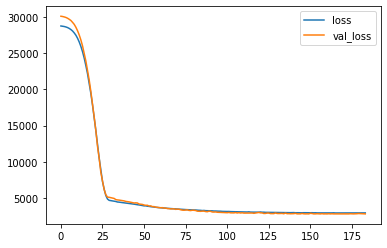

In [47]:
pd.DataFrame(model.history.history).plot()

In [0]:
predictions=model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
explained_variance_score(Y_test,predictions)

0.5637726407849857

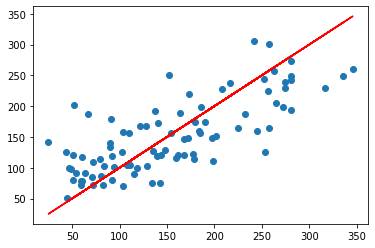

In [50]:

plt.scatter(Y_test,predictions)

plt.plot(Y_test,Y_test,'r')

In [0]:
errors = Y_test.values.reshape(89, 1) - predictions

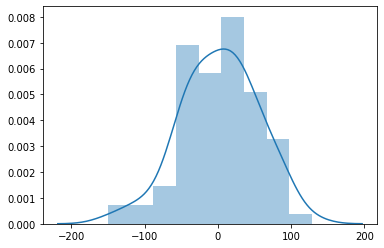

In [52]:
sns.distplot(errors)